In [1]:
%matplotlib inline

In [2]:
import stream as st
import scanpy as sc
import matplotlib.pyplot as plt

import numpy  as np
import pandas as pd
import os

from src.core import *

/home/ye/anaconda3/envs/Stream/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [3]:
st.__version__

'0.4.1'

In [8]:
adata=read("../test/subset/adata.h5ad",file_format="h5ad",workdir="../test/subset")

Saving results in: ../test/subset


In [9]:
add_cell_labels(adata,file_name="../test/subset/cell_label.tsv")
add_cell_colors(adata,file_name="../test/subset/cell_label_color.tsv")

In [10]:
filter_genes(adata,min_num_cells = 5)

Filter genes based on min_num_cells
After filtering out low-expressed genes: 
4384 cells, 11800 genes


using all the genes ...
20 PCs are selected


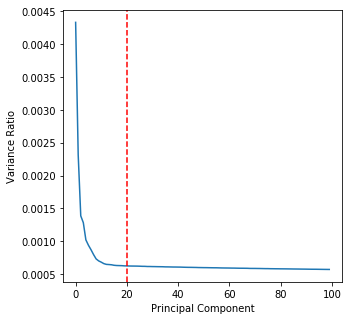

In [11]:
select_top_principal_components(adata,n_pc=20,first_pc=True)

500 variable genes are selected


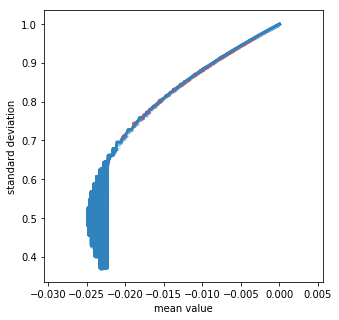

In [12]:
select_variable_genes(adata,n_genes=500)

In [13]:
dimension_reduction(adata,n_neighbors=20,n_components=2,n_jobs=8,method="se",feature="top_pcs")

feature top_pcs is being used ...
8 cpus are being used ...


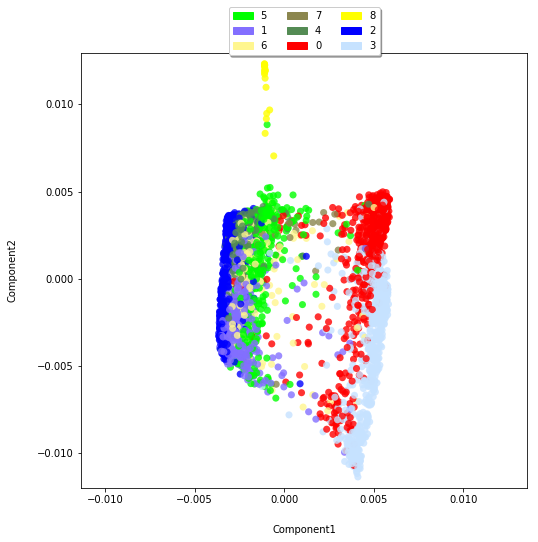

In [15]:
st.plot_dimension_reduction(adata)

In [16]:
st.seed_elastic_principal_graph(adata,n_clusters=10)

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 10
Calculatng minimum spanning tree...
Number of initial branches: 3


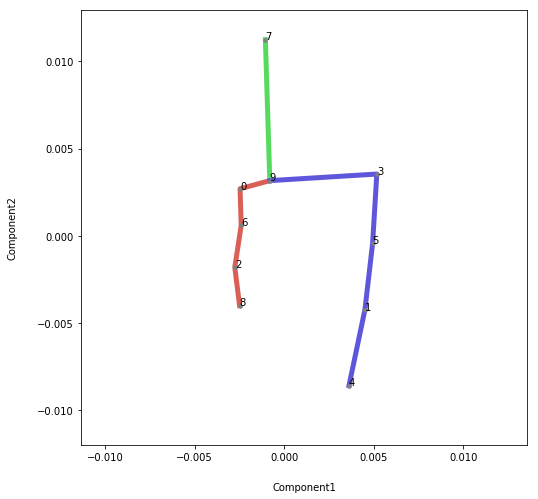

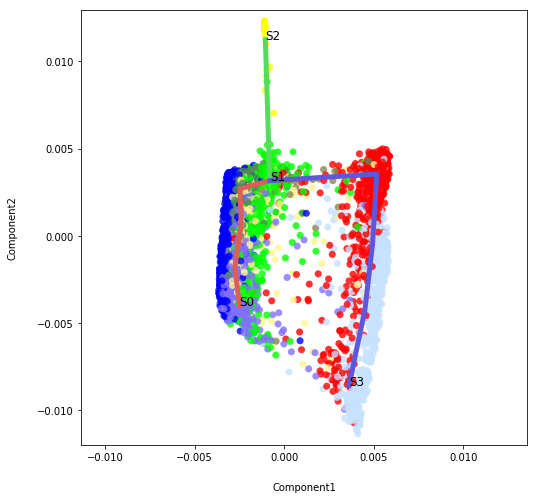

In [17]:
st.plot_branches(adata)
st.plot_branches_with_cells(adata,fig_legend=False)

In [18]:
st.elastic_principal_graph(adata,epg_alpha=0.02,epg_mu=0.1,epg_lambda=0.02)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 4384 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

0||50
	
1.12e-06
	
50
	
49
	
48
	
0
	
0
	
0
	
7.076e-07
	
6.811e-07
	
0.9701
	
0.9712
	
3.691e-07
	
4.333e-08
	
2.167e-06
	
0.0001083
	
0


43.004 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 1


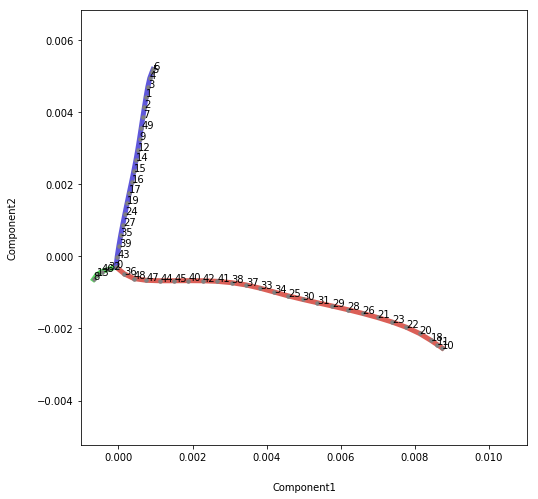

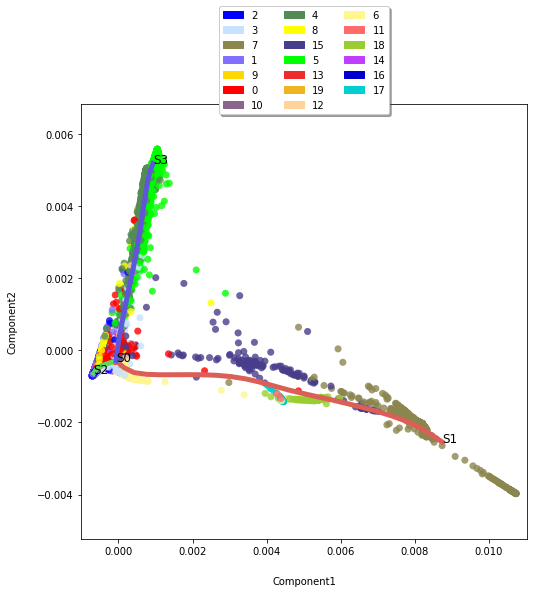

In [25]:
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

Optimizing branching...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 80 nodes on 16651 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
50
 
51
 
52
 
53
 
54
 
55
 
56
 
57
 
58
 
59
 
60
 
61
 
62
 
63
 
64
 
65
 
66
 
67
 
68
 
69
 
70
 
71
 
72
 
73
 
74
 
75
 
76
 
77
 
78
 
79
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1||80
	
5.986e-08
	
80
	
79
	
76
	
1
	
0
	
0
	
1.529e-08
	
1.362e-08
	
0.9976
	
0.9978
	
4.164e-08
	
2.924e-09
	
2.339e-07
	
1.871e-05
	
0


24.238 sec elapsed

Number of branches after optimizing branching: 3


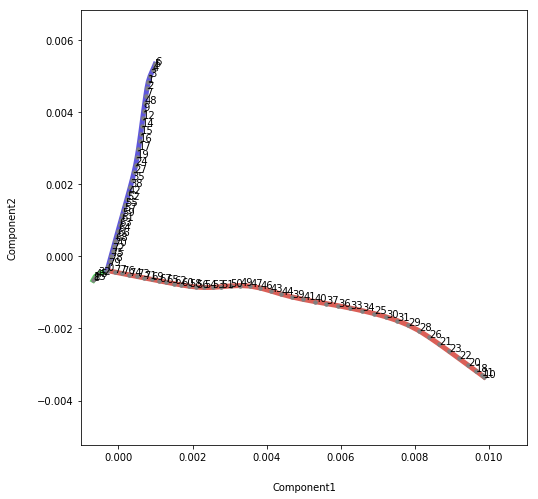

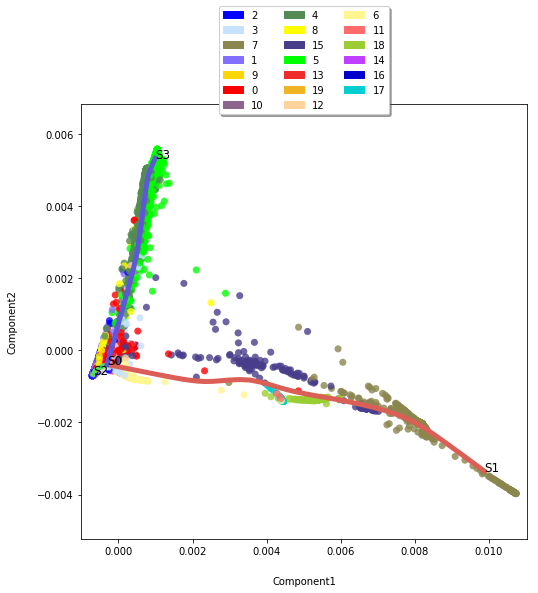

In [26]:
st.optimize_branching(adata,epg_alpha=0.02,epg_mu=0.1,epg_lambda=0.01)
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

Extending leaves with additional nodes ...
Number of branches after extending leaves: 1


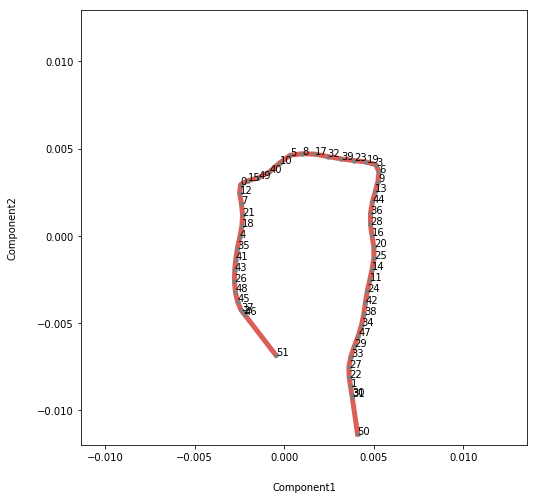

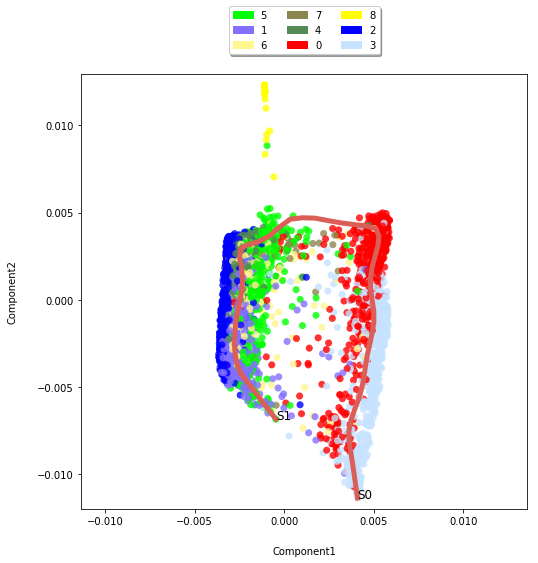

In [19]:
###Extend leaf branch to reach further cells 
st.extend_elastic_principal_graph(adata)
st.plot_branches(adata)
st.plot_branches_with_cells(adata)

/home/ye/anaconda3/envs/Stream/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


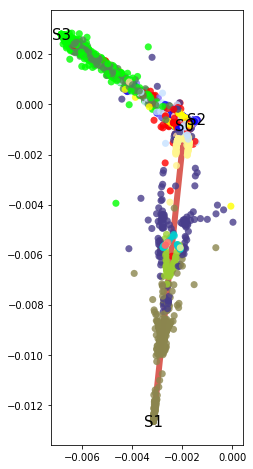

In [28]:
st.plot_flat_tree(adata,fig_legend=False)

In [3]:
#adata=st.read("stream_result/BC/stream_result.pkl",file_format="pkl",workdir="stream_result/BC")

Saving results in: stream_result/BC


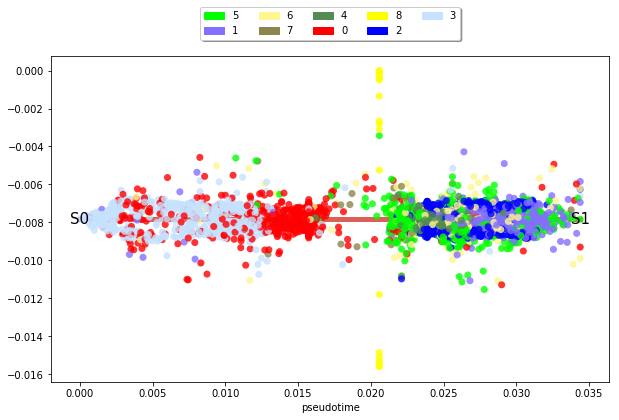

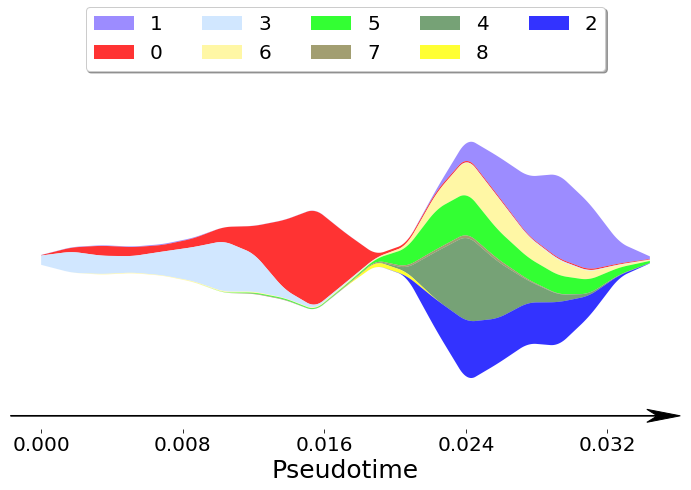

In [21]:
st.subwaymap_plot(adata,root='S0',fig_legend_ncol=5,percentile_dist=100) 
st.stream_plot(adata,root='S0',fig_legend_ncol=5,fig_size=(12,12))

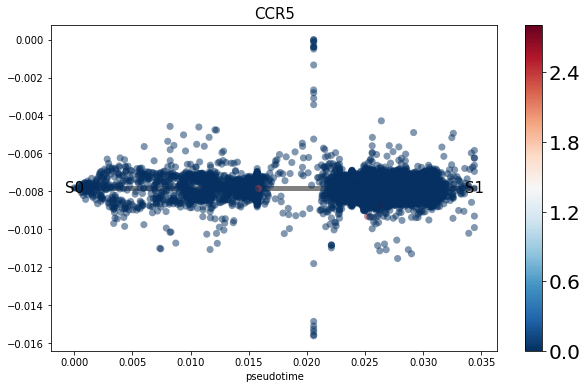

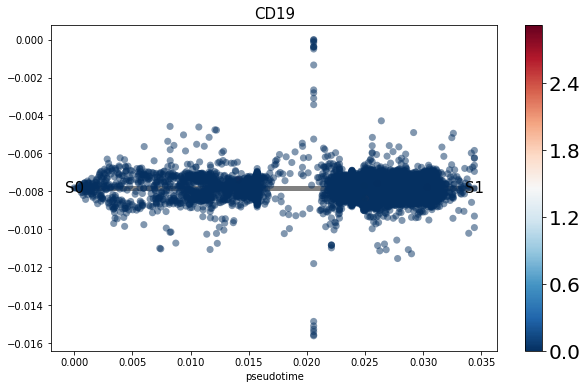

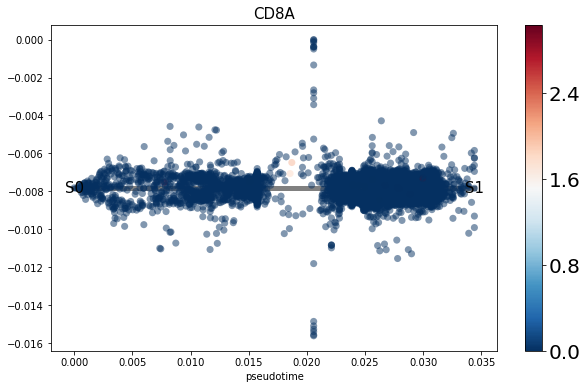

In [22]:
subwaymap_plot_gene(adata,percentile_dist=100,root='S0',genes=["CD8A","CD19","CCR5"])  # motified by myself

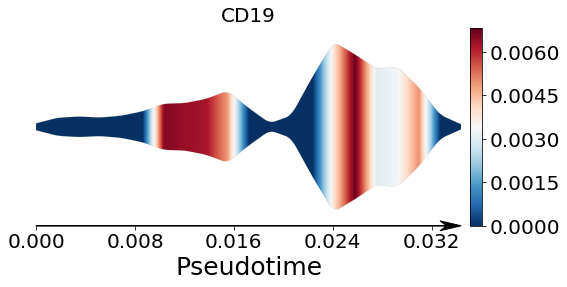

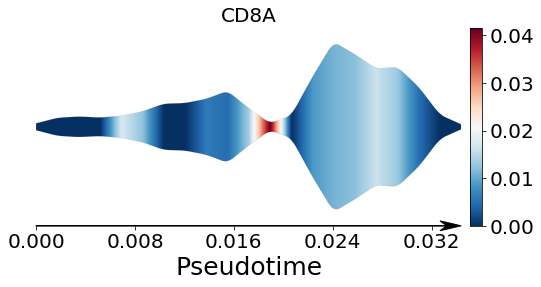

In [24]:
#st.write(adata,file_name='stream_result.pkl')
stream_plot_gene(adata,root='S0',fig_size=(8,8),genes=['CD8A','CD19'])

In [25]:
detect_transistion_genes(adata,root='S0')

Filtering out genes that are expressed in less than 5 cells ...
1 cpus are being used ...
11801 genes are being scanned ...


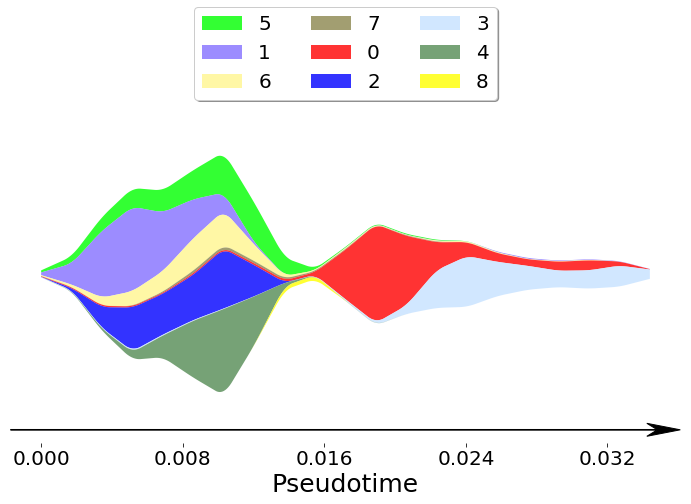

In [26]:
st.stream_plot(adata,root='S1',preference=['S0'],factor_min_win=1.5)

In [27]:
#from src.core import detect_de_genes,detect_leaf_genes
detect_leaf_genes(adata,root='S0',cutoff_zscore=1.0)

Importing precomputed scaled gene expression matrix ...
11801 genes are being scanned ...
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches


There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

In [28]:
adata.uns['leaf_genes_all'].head()

,zscore,H_statistic,H_pvalue,S0S1_pvalue


In [30]:
detect_transistion_genes(adata,root='S0')

Importing precomputed scaled gene expression matrix ...
11801 genes are being scanned ...


In [33]:
#st.write(adata,file_name='stream_result.pkl')

In [35]:
adata.uns['transition_genes'][('S0','S1')].head()

,stat,logfc,pval,qval
NFKBIA,-0.442916,1.304231,4.400278e-210,3.934289e-206


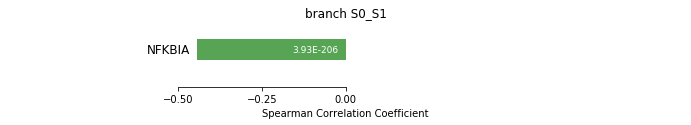

In [36]:
plot_transition_genes(adata)

In [37]:
detect_de_genes(adata,root='S1')

Importing precomputed scaled gene expression matrix ...
11801 genes are being scanned ...


In [ ]:
adata.uns['de_genes_greater'].keys()